In [113]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

from sklearn.ensemble import VotingClassifier

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

Label :  5


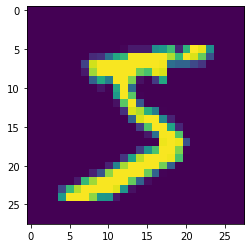

In [7]:
plt.imshow(x_train[0])
print('Label : ', y_train[0])

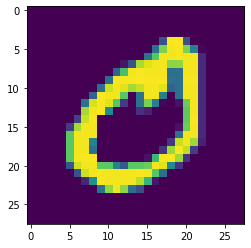

Label :  0


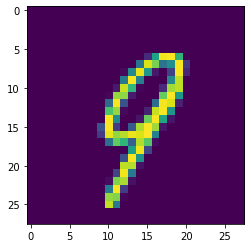

Label :  9


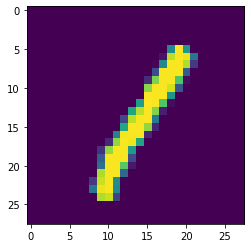

Label :  1


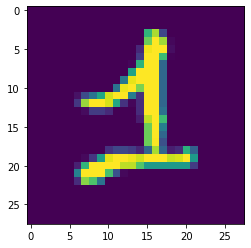

Label :  1


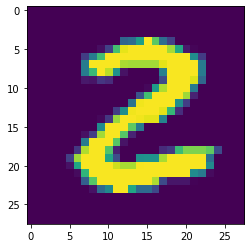

Label :  2


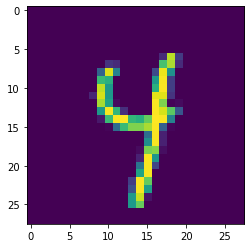

Label :  4


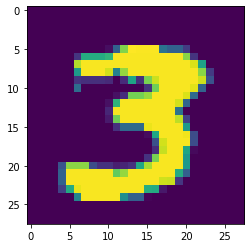

Label :  3


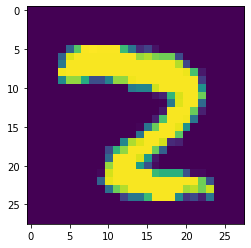

Label :  2


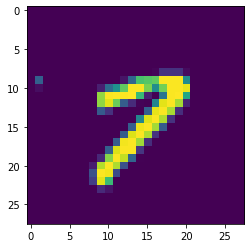

Label :  7


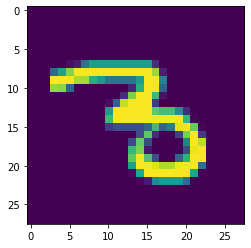

Label :  3


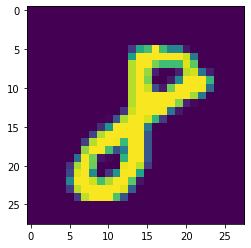

Label :  8


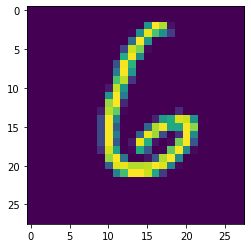

Label :  6


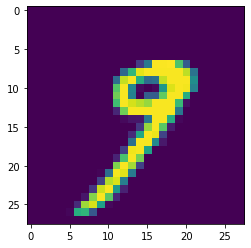

Label :  9


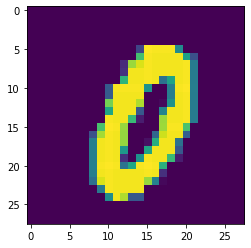

Label :  0


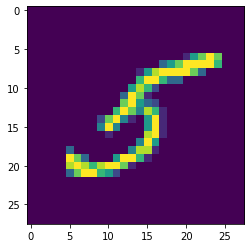

Label :  5


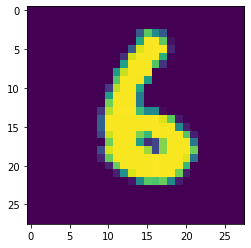

Label :  6


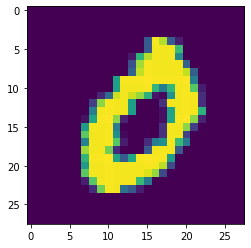

Label :  0


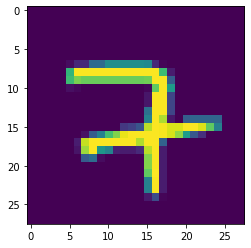

Label :  7


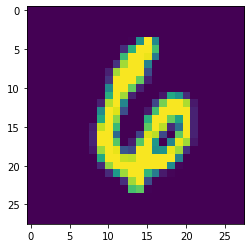

Label :  6


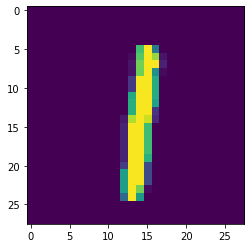

Label :  1


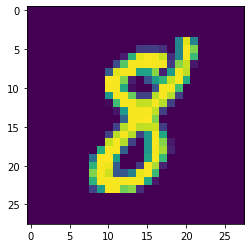

Label :  8


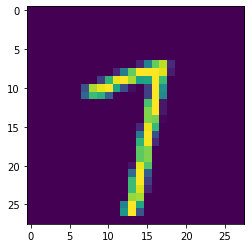

Label :  7


In [10]:
for i in range(21,43):
  plt.imshow(x_train[i])
  plt.show()
  print('Label : ', y_train[i])

In [16]:
x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2] )

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2] )

X_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2] )

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
y_test.shape

(10000, 10)

In [ ]:
#BASIC MLP MODEL

In [50]:
model = Sequential()

In [33]:
model.add(Dense(10, input_shape = (X_train.shape[1],), activation = 'sigmoid' ))
model.add(Dense(10, activation = 'sigmoid' ))
model.add(Dense(10, activation = 'sigmoid' ))
model.add(Dense(y_train.shape[1], activation = 'softmax'))


In [34]:
sgd = optimizers.SGD()
model.compile(optimizer= sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
history  = model.fit(X_train, y_train, epochs=10, validation_split=0.3, batch_size = 10, verbose=2)

Epoch 1/10
4200/4200 - 8s - loss: 0.3680 - accuracy: 0.1141 - val_loss: 0.3260 - val_accuracy: 0.1079 - 8s/epoch - 2ms/step
Epoch 2/10
4200/4200 - 8s - loss: 0.3250 - accuracy: 0.1141 - val_loss: 0.3248 - val_accuracy: 0.1078 - 8s/epoch - 2ms/step
Epoch 3/10
4200/4200 - 7s - loss: 0.3246 - accuracy: 0.1142 - val_loss: 0.3246 - val_accuracy: 0.1079 - 7s/epoch - 2ms/step
Epoch 4/10
4200/4200 - 8s - loss: 0.3244 - accuracy: 0.1143 - val_loss: 0.3244 - val_accuracy: 0.1079 - 8s/epoch - 2ms/step
Epoch 5/10
4200/4200 - 8s - loss: 0.3243 - accuracy: 0.1143 - val_loss: 0.3243 - val_accuracy: 0.1079 - 8s/epoch - 2ms/step
Epoch 6/10
4200/4200 - 8s - loss: 0.3241 - accuracy: 0.1142 - val_loss: 0.3241 - val_accuracy: 0.1079 - 8s/epoch - 2ms/step
Epoch 7/10
4200/4200 - 7s - loss: 0.3239 - accuracy: 0.1143 - val_loss: 0.3239 - val_accuracy: 0.1079 - 7s/epoch - 2ms/step
Epoch 8/10
4200/4200 - 7s - loss: 0.3237 - accuracy: 0.1143 - val_loss: 0.3237 - val_accuracy: 0.1079 - 7s/epoch - 2ms/step
Epoch 9/

In [36]:
history.history

{'loss': [0.36796554923057556,
  0.3250172734260559,
  0.3245986998081207,
  0.3244245946407318,
  0.32428082823753357,
  0.32412630319595337,
  0.32393690943717957,
  0.3237071633338928,
  0.3234483003616333,
  0.32310351729393005],
 'accuracy': [0.11414285749197006,
  0.11409524083137512,
  0.11423809826374054,
  0.11426190286874771,
  0.11426190286874771,
  0.11423809826374054,
  0.11426190286874771,
  0.11426190286874771,
  0.11428571492433548,
  0.11435714364051819],
 'val_loss': [0.3260349631309509,
  0.3247944414615631,
  0.3245730698108673,
  0.32443514466285706,
  0.32430383563041687,
  0.3241240382194519,
  0.3239099979400635,
  0.32367953658103943,
  0.3233693242073059,
  0.322959840297699],
 'val_accuracy': [0.10788889229297638,
  0.10783333331346512,
  0.10794444382190704,
  0.10794444382190704,
  0.10794444382190704,
  0.10794444382190704,
  0.10794444382190704,
  0.10794444382190704,
  0.10794444382190704,
  0.10794444382190704]}

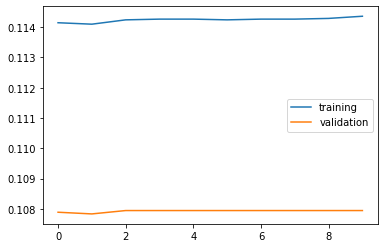

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()


In [39]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3229 - accuracy: 0.1124


[0.3228912353515625, 0.11243333667516708]

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3229 - accuracy: 0.1134


[0.3228573501110077, 0.11339999735355377]

In [ ]:
#Intialization of proper weights

In [42]:
model = Sequential()

In [43]:
model.add(Dense(10, input_shape = (X_train.shape[1],), kernel_initializer='he_normal'  ,activation = 'sigmoid' ))
model.add(Dense(10, kernel_initializer='he_normal'  , activation = 'sigmoid' ))
model.add(Dense(10, kernel_initializer='he_normal'  ,activation = 'sigmoid' ))
model.add(Dense(y_train.shape[1], kernel_initializer='he_normal'  ,activation = 'softmax'))


In [44]:
sgd = optimizers.SGD()
model.compile(optimizer= sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [45]:
history  = model.fit(X_train, y_train, epochs=10, validation_split=0.3, batch_size = 10, verbose=2)

Epoch 1/10
4200/4200 - 8s - loss: 0.3824 - accuracy: 0.1219 - val_loss: 0.3235 - val_accuracy: 0.1910 - 8s/epoch - 2ms/step
Epoch 2/10
4200/4200 - 9s - loss: 0.3215 - accuracy: 0.1804 - val_loss: 0.3203 - val_accuracy: 0.1774 - 9s/epoch - 2ms/step
Epoch 3/10
4200/4200 - 8s - loss: 0.3190 - accuracy: 0.2240 - val_loss: 0.3179 - val_accuracy: 0.2472 - 8s/epoch - 2ms/step
Epoch 4/10
4200/4200 - 8s - loss: 0.3165 - accuracy: 0.2660 - val_loss: 0.3154 - val_accuracy: 0.2875 - 8s/epoch - 2ms/step
Epoch 5/10
4200/4200 - 8s - loss: 0.3138 - accuracy: 0.3055 - val_loss: 0.3125 - val_accuracy: 0.3054 - 8s/epoch - 2ms/step
Epoch 6/10
4200/4200 - 7s - loss: 0.3107 - accuracy: 0.3161 - val_loss: 0.3091 - val_accuracy: 0.3195 - 7s/epoch - 2ms/step
Epoch 7/10
4200/4200 - 8s - loss: 0.3067 - accuracy: 0.3379 - val_loss: 0.3046 - val_accuracy: 0.3370 - 8s/epoch - 2ms/step
Epoch 8/10
4200/4200 - 8s - loss: 0.3021 - accuracy: 0.3533 - val_loss: 0.2997 - val_accuracy: 0.3573 - 8s/epoch - 2ms/step
Epoch 9/

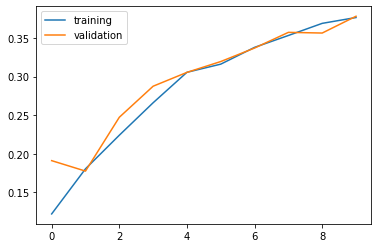

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()


In [47]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2884 - accuracy: 0.3832


[0.2884278893470764, 0.38316667079925537]

In [48]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2878 - accuracy: 0.3862


[0.28778380155563354, 0.3862000107765198]

In [59]:
# 2. Non Saturating Activation function

In [52]:
model = Sequential()

In [53]:
model.add(Dense(10, input_shape = (X_train.shape[1],), activation = 'elu' ))
model.add(Dense(10, activation = 'elu' ))
model.add(Dense(10, activation = 'elu' ))
model.add(Dense(y_train.shape[1], activation = 'softmax'))


In [54]:
sgd = optimizers.SGD()
model.compile(optimizer= sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [55]:
history  = model.fit(X_train, y_train, epochs=10, validation_split=0.3, batch_size = 10, verbose=2)

Epoch 1/10
4200/4200 - 9s - loss: 0.3276 - accuracy: 0.2501 - val_loss: 0.2688 - val_accuracy: 0.3539 - 9s/epoch - 2ms/step
Epoch 2/10
4200/4200 - 7s - loss: 0.2496 - accuracy: 0.4069 - val_loss: 0.2349 - val_accuracy: 0.4721 - 7s/epoch - 2ms/step
Epoch 3/10
4200/4200 - 7s - loss: 0.2266 - accuracy: 0.4935 - val_loss: 0.2071 - val_accuracy: 0.5618 - 7s/epoch - 2ms/step
Epoch 4/10
4200/4200 - 8s - loss: 0.2021 - accuracy: 0.5630 - val_loss: 0.2040 - val_accuracy: 0.5554 - 8s/epoch - 2ms/step
Epoch 5/10
4200/4200 - 8s - loss: 0.1920 - accuracy: 0.5810 - val_loss: 0.1866 - val_accuracy: 0.5938 - 8s/epoch - 2ms/step
Epoch 6/10
4200/4200 - 8s - loss: 0.1878 - accuracy: 0.5960 - val_loss: 0.1851 - val_accuracy: 0.6072 - 8s/epoch - 2ms/step
Epoch 7/10
4200/4200 - 7s - loss: 0.1844 - accuracy: 0.6087 - val_loss: 0.1800 - val_accuracy: 0.6081 - 7s/epoch - 2ms/step
Epoch 8/10
4200/4200 - 8s - loss: 0.1814 - accuracy: 0.6187 - val_loss: 0.1899 - val_accuracy: 0.5962 - 8s/epoch - 2ms/step
Epoch 9/

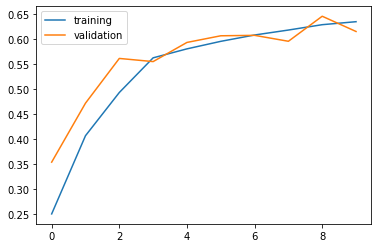

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()


In [57]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1814 - accuracy: 0.6181


[0.18144413828849792, 0.6180999875068665]

In [58]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1816 - accuracy: 0.6121


[0.1815752536058426, 0.6121000051498413]

In [ ]:
# 3. Optimizers

In [60]:
model = Sequential()

In [61]:
model.add(Dense(10, input_shape = (X_train.shape[1],), activation = 'sigmoid' ))
model.add(Dense(10, activation = 'sigmoid' ))
model.add(Dense(10, activation = 'sigmoid' ))
model.add(Dense(y_train.shape[1], activation = 'softmax'))


In [62]:
adam = optimizers.Adam()
model.compile(optimizer= adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [63]:
history  = model.fit(X_train, y_train, epochs=10, validation_split=0.3, batch_size = 10, verbose=2)

Epoch 1/10
4200/4200 - 10s - loss: 0.3012 - accuracy: 0.2144 - val_loss: 0.2681 - val_accuracy: 0.3051 - 10s/epoch - 2ms/step
Epoch 2/10
4200/4200 - 9s - loss: 0.2536 - accuracy: 0.3660 - val_loss: 0.2378 - val_accuracy: 0.4402 - 9s/epoch - 2ms/step
Epoch 3/10
4200/4200 - 8s - loss: 0.2201 - accuracy: 0.5053 - val_loss: 0.2004 - val_accuracy: 0.5327 - 8s/epoch - 2ms/step
Epoch 4/10
4200/4200 - 9s - loss: 0.1902 - accuracy: 0.5914 - val_loss: 0.1818 - val_accuracy: 0.5620 - 9s/epoch - 2ms/step
Epoch 5/10
4200/4200 - 8s - loss: 0.1653 - accuracy: 0.6529 - val_loss: 0.1513 - val_accuracy: 0.6894 - 8s/epoch - 2ms/step
Epoch 6/10
4200/4200 - 8s - loss: 0.1558 - accuracy: 0.6777 - val_loss: 0.1511 - val_accuracy: 0.6642 - 8s/epoch - 2ms/step
Epoch 7/10
4200/4200 - 9s - loss: 0.1470 - accuracy: 0.6910 - val_loss: 0.1346 - val_accuracy: 0.7250 - 9s/epoch - 2ms/step
Epoch 8/10
4200/4200 - 9s - loss: 0.1409 - accuracy: 0.7181 - val_loss: 0.1340 - val_accuracy: 0.7371 - 9s/epoch - 2ms/step
Epoch 

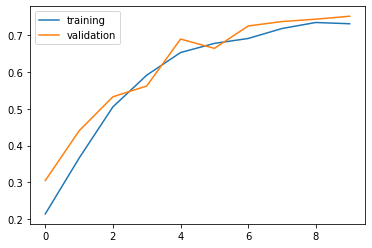

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()


In [65]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1298 - accuracy: 0.7538


[0.1297682225704193, 0.753766655921936]

In [66]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1270 - accuracy: 0.7587


[0.1270381361246109, 0.7587000131607056]

In [ ]:
# 4. Batch Normilization

In [94]:
model = Sequential()

In [95]:
model.add(Dense(10, input_shape = (X_train.shape[1],), activation = 'sigmoid' ))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'sigmoid' ))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'sigmoid' ))
model.add(BatchNormalization())
model.add(Dense(y_train.shape[1], activation = 'softmax'))


In [96]:
sgd = optimizers.SGD()
model.compile(optimizer= sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [98]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                7850      
                                                                 
 batch_normalization_3 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_4 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_5 (Batc  (None, 10)             

In [71]:
history  = model.fit(X_train, y_train, epochs=10, validation_split=0.3, batch_size = 10, verbose=2)

Epoch 1/10
4200/4200 - 10s - loss: 0.3717 - accuracy: 0.3575 - val_loss: 0.2320 - val_accuracy: 0.5124 - 10s/epoch - 2ms/step
Epoch 2/10
4200/4200 - 9s - loss: 0.2334 - accuracy: 0.4973 - val_loss: 0.2087 - val_accuracy: 0.5269 - 9s/epoch - 2ms/step
Epoch 3/10
4200/4200 - 9s - loss: 0.2186 - accuracy: 0.5089 - val_loss: 0.2043 - val_accuracy: 0.5139 - 9s/epoch - 2ms/step
Epoch 4/10
4200/4200 - 9s - loss: 0.2139 - accuracy: 0.5100 - val_loss: 0.2150 - val_accuracy: 0.4942 - 9s/epoch - 2ms/step
Epoch 5/10
4200/4200 - 9s - loss: 0.2086 - accuracy: 0.5237 - val_loss: 0.1864 - val_accuracy: 0.5434 - 9s/epoch - 2ms/step
Epoch 6/10
4200/4200 - 9s - loss: 0.2042 - accuracy: 0.5249 - val_loss: 0.1927 - val_accuracy: 0.5306 - 9s/epoch - 2ms/step
Epoch 7/10
4200/4200 - 9s - loss: 0.2037 - accuracy: 0.5218 - val_loss: 0.1874 - val_accuracy: 0.5423 - 9s/epoch - 2ms/step
Epoch 8/10
4200/4200 - 9s - loss: 0.2029 - accuracy: 0.5318 - val_loss: 0.1825 - val_accuracy: 0.5503 - 9s/epoch - 2ms/step
Epoch 

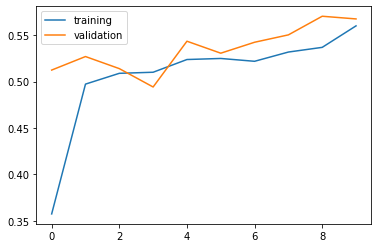

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()


In [73]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1875 - accuracy: 0.5617


[0.18746590614318848, 0.5616666674613953]

In [75]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1835 - accuracy: 0.5696


[0.18351997435092926, 0.569599986076355]

In [ ]:
# 5. Dropout

In [82]:
model = Sequential()

In [83]:
model.add(Dense(10, input_shape = (X_train.shape[1],), activation = 'elu' ))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'elu' ))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'elu' ))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation = 'softmax'))


In [84]:
sgd = optimizers.SGD()
model.compile(optimizer= sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [93]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                7850      
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_34 (Dense)            (None, 10)                110       
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_35 (Dense)            (None, 10)              

In [85]:
history  = model.fit(X_train, y_train, epochs=10, validation_split=0.3, batch_size = 10, verbose=2)

Epoch 1/10
4200/4200 - 9s - loss: 0.3862 - accuracy: 0.1022 - val_loss: 0.3250 - val_accuracy: 0.1079 - 9s/epoch - 2ms/step
Epoch 2/10
4200/4200 - 8s - loss: 0.3424 - accuracy: 0.1015 - val_loss: 0.3250 - val_accuracy: 0.1079 - 8s/epoch - 2ms/step
Epoch 3/10
4200/4200 - 8s - loss: 0.3372 - accuracy: 0.1047 - val_loss: 0.3250 - val_accuracy: 0.1079 - 8s/epoch - 2ms/step
Epoch 4/10
4200/4200 - 8s - loss: 0.3349 - accuracy: 0.1027 - val_loss: 0.3250 - val_accuracy: 0.1079 - 8s/epoch - 2ms/step
Epoch 5/10
4200/4200 - 7s - loss: 0.3336 - accuracy: 0.1001 - val_loss: 0.3250 - val_accuracy: 0.1079 - 7s/epoch - 2ms/step
Epoch 6/10
4200/4200 - 8s - loss: 0.3322 - accuracy: 0.1046 - val_loss: 0.3250 - val_accuracy: 0.1079 - 8s/epoch - 2ms/step
Epoch 7/10
4200/4200 - 8s - loss: 0.3317 - accuracy: 0.1025 - val_loss: 0.3250 - val_accuracy: 0.1079 - 8s/epoch - 2ms/step
Epoch 8/10
4200/4200 - 8s - loss: 0.3310 - accuracy: 0.1049 - val_loss: 0.3250 - val_accuracy: 0.1079 - 8s/epoch - 2ms/step
Epoch 9/

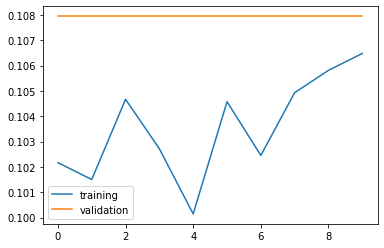

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()


In [90]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3249 - accuracy: 0.1124


[0.3249465525150299, 0.11236666887998581]

In [100]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6497 - accuracy: 0.1010


[0.6497325897216797, 0.10100000351667404]

In [99]:
#CONSOLIDATED ARCHITECTURE


In [101]:
model = Sequential()

In [102]:
model.add(Dense(10, input_shape = (X_train.shape[1],), kernel_initializer='he_normal' , activation = 'elu' ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, kernel_initializer='he_normal' , activation = 'elu' ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, kernel_initializer='he_normal' , activation = 'elu' ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], kernel_initializer='he_normal' , activation = 'softmax'))


In [103]:
adam = optimizers.Adam()
model.compile(optimizer= adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [104]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                7850      
                                                                 
 batch_normalization_6 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_41 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_7 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 10)              

In [105]:
history  = model.fit(X_train, y_train, epochs=10, validation_split=0.3, batch_size = 10, verbose=2)

Epoch 1/10
4200/4200 - 11s - loss: 1.4021 - accuracy: 0.5239 - val_loss: 0.5550 - val_accuracy: 0.8577 - 11s/epoch - 3ms/step
Epoch 2/10
4200/4200 - 10s - loss: 1.0196 - accuracy: 0.6682 - val_loss: 0.4467 - val_accuracy: 0.8810 - 10s/epoch - 2ms/step
Epoch 3/10
4200/4200 - 10s - loss: 0.9379 - accuracy: 0.7001 - val_loss: 0.4084 - val_accuracy: 0.8847 - 10s/epoch - 2ms/step
Epoch 4/10
4200/4200 - 10s - loss: 0.8854 - accuracy: 0.7187 - val_loss: 0.3963 - val_accuracy: 0.8876 - 10s/epoch - 2ms/step
Epoch 5/10
4200/4200 - 10s - loss: 0.8692 - accuracy: 0.7261 - val_loss: 0.4001 - val_accuracy: 0.8874 - 10s/epoch - 2ms/step
Epoch 6/10
4200/4200 - 10s - loss: 0.8484 - accuracy: 0.7350 - val_loss: 0.3830 - val_accuracy: 0.8943 - 10s/epoch - 2ms/step
Epoch 7/10
4200/4200 - 10s - loss: 0.8357 - accuracy: 0.7406 - val_loss: 0.3730 - val_accuracy: 0.8945 - 10s/epoch - 2ms/step
Epoch 8/10
4200/4200 - 10s - loss: 0.8231 - accuracy: 0.7462 - val_loss: 0.3739 - val_accuracy: 0.8956 - 10s/epoch - 2

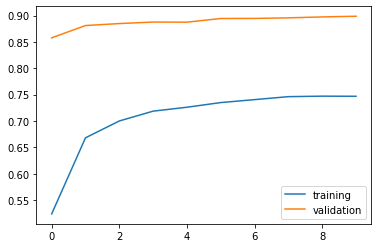

In [106]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()


In [107]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3578 - accuracy: 0.9020


[0.35784995555877686, 0.9020333290100098]

In [108]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3696 - accuracy: 0.8944


[0.3696071207523346, 0.8944000005722046]

In [ ]:
#CONSOLIDATED ARCHITECTURE with callback


In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(10, input_shape = (X_train.shape[1],), kernel_initializer='he_normal' , activation = 'elu' ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, kernel_initializer='he_normal' , activation = 'elu' ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, kernel_initializer='he_normal' , activation = 'elu' ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], kernel_initializer='he_normal' , activation = 'softmax'))


In [ ]:
adam = optimizers.Adam()
model.compile(optimizer= adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                7850      
                                                                 
 batch_normalization_6 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_41 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_7 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 10)              

In [176]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=3)


In [179]:
history  = model.fit(X_train, y_train, epochs=10, validation_split=0.3, batch_size = 10, callbacks = [callback], verbose=2)

Epoch 1/10
4200/4200 - 12s - loss: 0.8158 - accuracy: 0.7472 - val_loss: 0.3549 - val_accuracy: 0.9031 - 12s/epoch - 3ms/step
Epoch 2/10
4200/4200 - 11s - loss: 0.8109 - accuracy: 0.7501 - val_loss: 0.3600 - val_accuracy: 0.8989 - 11s/epoch - 3ms/step
Epoch 3/10
4200/4200 - 11s - loss: 0.8111 - accuracy: 0.7492 - val_loss: 0.3701 - val_accuracy: 0.8964 - 11s/epoch - 3ms/step
Epoch 4/10
4200/4200 - 11s - loss: 0.8019 - accuracy: 0.7553 - val_loss: 0.3595 - val_accuracy: 0.8992 - 11s/epoch - 3ms/step
Epoch 5/10
4200/4200 - 14s - loss: 0.8023 - accuracy: 0.7520 - val_loss: 0.3507 - val_accuracy: 0.8987 - 14s/epoch - 3ms/step
Epoch 6/10
4200/4200 - 11s - loss: 0.7954 - accuracy: 0.7567 - val_loss: 0.3636 - val_accuracy: 0.9001 - 11s/epoch - 3ms/step
Epoch 7/10
4200/4200 - 11s - loss: 0.8030 - accuracy: 0.7547 - val_loss: 0.3565 - val_accuracy: 0.8971 - 11s/epoch - 3ms/step
Epoch 8/10
4200/4200 - 14s - loss: 0.7930 - accuracy: 0.7548 - val_loss: 0.3454 - val_accuracy: 0.9047 - 14s/epoch - 3

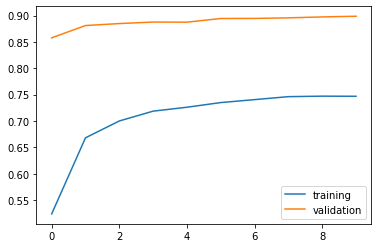

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()


In [ ]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3578 - accuracy: 0.9020


[0.35784995555877686, 0.9020333290100098]

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3696 - accuracy: 0.8944


[0.3696071207523346, 0.8944000005722046]